In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.dpi": 80}
sns.set_style()
sns.set_theme(context="paper", style="ticks", rc=custom_params)

In [3]:
labels = []
for label in open("../rethink/data/schreder.names").readlines():
    labels.append(label.strip())

In [4]:
def import_csv(path):
    df = pd.read_csv(path)
    total = 0
    data = {"label": [], "dataset": []}
    for i, row in df.iterrows():
        total += 1
        for label in labels:
            if int(row[label]) == 1:
                data["label"].append(label)
                data["dataset"].append(df.iloc[i]["dataset"])
    out_df = pd.DataFrame(data)
    out_df = out_df.sort_values(by=["label"])
    return out_df, total


def import_all_csv(path_arr):
    dfs = []
    total_audio_clips = 0
    for path in path_arr:
        df, n_audio_clips = import_csv(path)
        dfs.append(df)
        total_audio_clips += n_audio_clips

    df = pd.concat(dfs, ignore_index=True)
    return df, total_audio_clips

In [5]:
def plot_stats(df, n_audio_clips, group_schreder=True, save=False):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    if group_schreder:
        df = df.replace(to_replace=r"^\d+_\d+_\d+$", value="Schréder", regex=True)
    sns.histplot(data=df, x="label", hue="dataset", multiple="stack").set(title="Total of occurrences")

    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
        label.set_size("large")
    ax.get_legend().set_title("Dataset")
    plt.show()
    if save:
        fig.savefig("audio_data_stats.svg", bbox_inches="tight")

    print(
        df["dataset"].value_counts()
    )

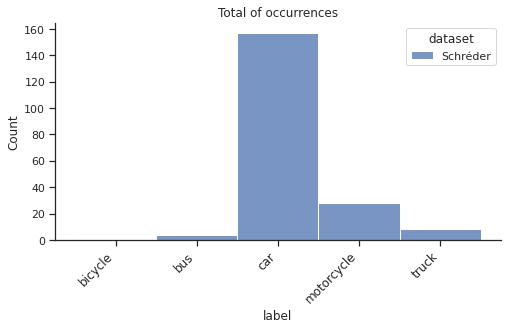

Schréder    198
Name: dataset, dtype: int64


In [7]:
labels_df, n_audio_clips = import_csv("/media/magalhaes/schreder_sound/22_9_2022_labels.csv")
plot_stats(labels_df, n_audio_clips)

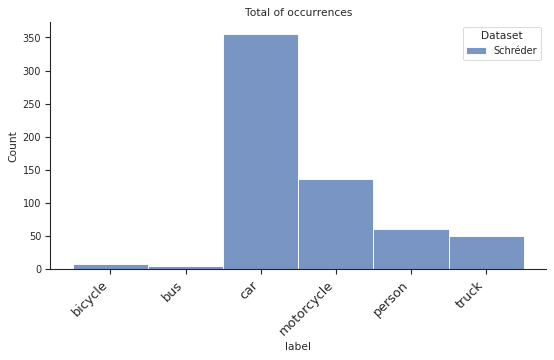

Schréder    612
Name: dataset, dtype: int64


In [6]:
labels_df, n_audio_clips = import_csv("/media/magalhaes/schreder_sound/11_04_2023_labels.csv")
plot_stats(labels_df, n_audio_clips)

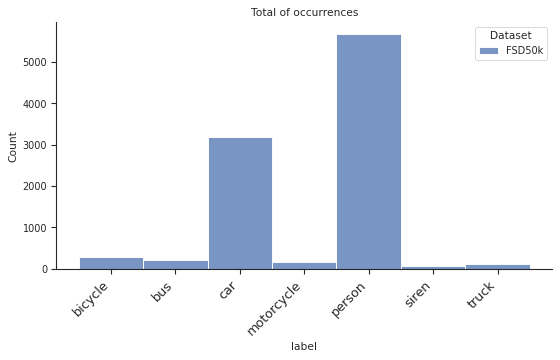

FSD50k    9722
Name: dataset, dtype: int64


In [7]:
labels_df, n_audio_clips = import_csv("/media/magalhaes/FSD50K/schreder_labels.csv")
plot_stats(labels_df, n_audio_clips)

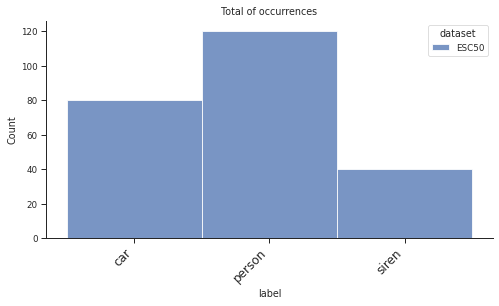

ESC50    240
Name: dataset, dtype: int64


In [9]:
labels_df, n_audio_clips = import_all_csv(
    [
        "/media/magalhaes/ESC-50/schreder_labels.csv",
    ]
)
plot_stats(labels_df, n_audio_clips)


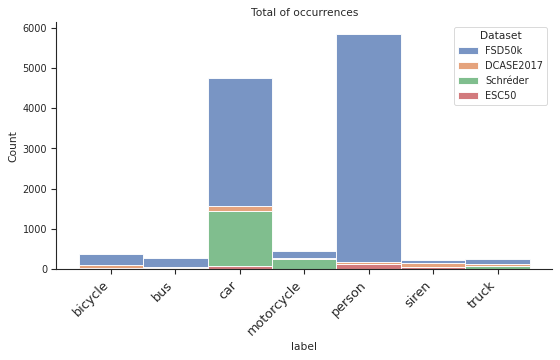

FSD50k       9722
Schréder     1688
DCASE2017     472
ESC50         240
Name: dataset, dtype: int64


In [16]:
labels_df, n_audio_clips = import_csv("/media/magalhaes/sound/datasets/sound_1677779968.csv")
plot_stats(labels_df, n_audio_clips, save=True)

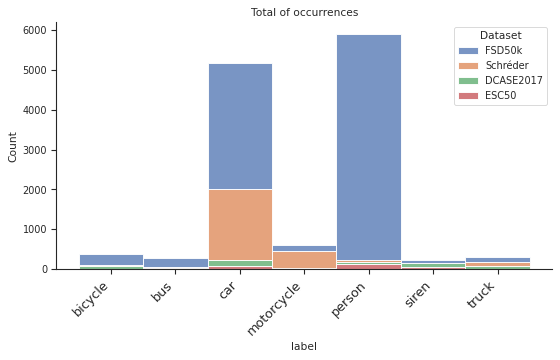

FSD50k       9722
Schréder     2429
DCASE2017     472
ESC50         240
Name: dataset, dtype: int64


In [8]:
labels_df, n_audio_clips = import_csv("/media/magalhaes/sound/datasets/sound_1684340863.csv")
plot_stats(labels_df, n_audio_clips, save=True)

## Spec Distribution

In [24]:
from rethink.dataset import AudioDataset
from rethink.preprocess import Loader, Trimmer, LogMelSpectrogramExtractorModel

In [41]:
data_path = "/media/magalhaes/sound/spectograms/dataset_1672335891_split1.pkl"

In [46]:
def plot_spec_mean_dist(data_path):
    dataset = AudioDataset(data_path)
    means = []
    for i in range(len(dataset)):
        sample, _ = dataset[i]
        means.append(sample.mean())
    plt.hist(means, bins=50)

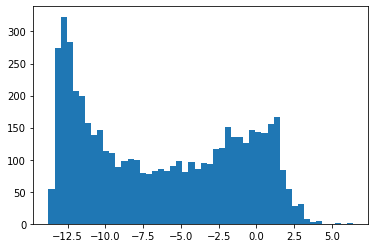

In [47]:
plot_spec_mean_dist(data_path)

In [28]:
dataset_path = "/media/magalhaes/sound/datasets/sound_1677779968.csv"

In [26]:
def plot_waveform_mean_dist(data_path):
    audios_df = pd.read_csv(data_path, skipinitialspace=True)
    loader = Loader(22050)
    trimmer = Trimmer(22050, 10)
    extrator = LogMelSpectrogramExtractorModel(22050, 128, 250, 10)
    specs = []
    means = []
    for i, row in audios_df.iterrows():
        waveform = loader(row["audio_filename"])
        waveform = trimmer(waveform)
        spec = extrator(waveform)
        specs.append(spec)
        means.append(spec.mean())
    specs = torch.stack(specs)
    print(specs.mean())
    print(specs.std())
    plt.hist(means, bins=50)

tensor(0.4736)
tensor(0.9491)


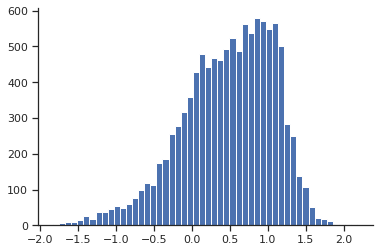

In [29]:
plot_waveform_mean_dist(dataset_path)